# Лабораториска вежба бр.2
## Класификација

Потребно е да се направи предвидување на тип на овошје според неговите дадени карактеристики:
1. маса
2. ширина
3. висина
4. боја

Податочното множество е зачувано во датотеката "fruit_data_with_colors.csv" и податоците се дадени за два типа на овошје: јаболка и портокали. Да се реализираат следните чекори при одработување на вежбата:

1. Со помош на библиотеката pandas прочитајте ја датотеката која го содржи множеството
2. Влезните и излезните податоци зачувајте ги во променливите X и y, соодветно
3. Извршете поделба за тренирање и тестирање со сооднос 70% према 30%. Резултатите да се зачуваат во променливите X_train, X_test, y_train, y_test соодветно.
4. Извршете го дадениот код за да направите визуелизација на податоците за атрибутите маса и боја.
5. Направете тренирање на повеќе алгоритми на класификација, дадени во листата подолу, евалуирајте ја нивната точност
6. Испечатете Confusion Matrix за секој од истренираните алгоритми соодветно
7. Споредете ги резултатите и образложете кој е најдобриот алгоритам за даденото податочно множество

# Ќелија за вклучување на соодветни библиотеки

In [128]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split

%matplotlib inline

# Ќелија за вчитување на податоците и сместување во соодветните променливи

Користете pandas data frames и прикажете ги првите 5 редови.
hint: 
- pd.read_csv('IA-Lab2-fruit_data_with_colors')
- fruits[:5]

In [129]:
fruits = pd.read_csv('IA-Lab2-fruit_data_with_colors.csv')
print(fruits.shape)
fruits.head()


(38, 7)


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,0,orange,turkey_navel,154,7.2,7.2,0.82
1,0,orange,selected_seconds,140,6.7,7.1,0.72
2,0,orange,spanish_jumbo,356,9.2,9.2,0.75
3,0,orange,turkey_navel,190,7.5,8.1,0.74
4,0,orange,turkey_navel,144,6.8,7.4,0.75


Класата ви се наоѓа во првата колона - fruit_label. Одделете ја во посебна променлива "y" и испечатете ги првите 5 вредности.
- Google hint: select column from pandas dataframe

In [130]:
y = fruits['fruit_label']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: fruit_label, dtype: int64

Одделете ги следните 4 колони во посебна променлива - X. 
<br>Тоа ќе ви бидат feature vectors.
- ['mass', 'width', 'height', 'color_score']
- Google hint: select columns from pandas dataframe

Испечатете ги првите 5 вредности на Х

In [131]:
x = fruits[['mass', 'width', 'height', 'color_score']]
x.head()


,mass,width,height,color_score
0,154,7.2,7.2,0.82
1,140,6.7,7.1,0.72
2,356,9.2,9.2,0.75
3,190,7.5,8.1,0.74
4,144,6.8,7.4,0.75


In [132]:
print (fruits['fruit_name'].unique())


['orange' 'apple']


# Поделба на множеството (train, test)

Искористете: 
- X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

Испечатете колку редици и колку колони има секоја од променливите: X_train, X_test, y_train, y_test - користете ".shape"

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)
print ("Shape of x_train: ", x_train.shape)
print ("Shape of x_test: ", x_test.shape)
print ("Shape of y_train: ", y_train.shape)
print ("Shape of y_test: ", y_test.shape)

Shape of x_train:  (30, 4)
Shape of x_test:  (8, 4)
Shape of y_train:  (30,)
Shape of y_test:  (8,)


Доколку досега се успешно сте завршиле, следниов код треба да ви испечати ScatterPlot на тренинг и на тест податоците за атрибутите: Mass и Color_Score

Text(0, 0.5, 'Color_score')

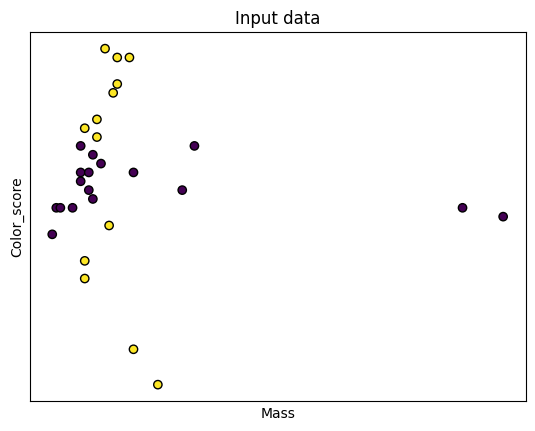

In [134]:
ax = plt.subplot(1, 1, 1)

ax.set_title("Input data")

ax.scatter(x_train.iloc[:, [0]], x_train.iloc[:, [3]], c=y_train, 
           edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_xlabel("Mass")
ax.set_ylabel("Color_score")

## Дефинирање на алгоритми

Соодветно креирајте ги 3те класификациски модели:
- К најблиски соседи - со 3 најблиски соседи
- Дрво на одлука - максимална длабочина 5 - max_depth=5
- Невронска мрежа - Multilayer Perceptron - alpha=1, max_iter=1000

Hint: 
- knn = KNeighborsClassifier(3)
- dt = DecisionTreeClassifier(max_depth=5)
- nn = MLPClassifier(alpha=1, max_iter=1000)

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

knn = KNeighborsClassifier(3)
dt = DecisionTreeClassifier(max_depth=5)
nn = MLPClassifier(alpha=1, max_iter=1000)


## Tренирање и евалуација на алгоритмите 

За KNN на пример користете: knn.fit(X_train, y_train)
    
За добивање на точноста користете: knn_score = clf.score(X_test, y_test)

Направете го тоа за сите 3 алгоритми/модели.

In [136]:
knn.fit(x_train, y_train)
knn_score = knn.score(x_test, y_test)

dt.fit(x_train, y_train)
dt_score = dt.score(x_test, y_test)

nn.fit(x_train, y_train)
nn_score = nn.score(x_test, y_test)

Испечатете ја точноста на секој од трите алгоритми.

print("KNN accuracy: ", knn_score)

In [137]:
print ("KNN accuracy: ", knn_score)
print ("Decision Tree accuracy: ", dt_score)
print ("Neural Network accuracy: ", nn_score)

KNN accuracy:  0.375
Decision Tree accuracy:  1.0
Neural Network accuracy:  0.5


## Печатење на Confusion Matrix за секој алгоритам соодветно

Користете: confusion_matrix(y_test, y_pred_knn)

Каде што: y_pred_knn = knn.predict(X_test)

Направете го истото за останатите 2 алгоритми

In [138]:
from sklearn.metrics import confusion_matrix

y_pred_knn = knn.predict(x_test)
y_pred_dt = dt.predict(x_test)
y_pred_nn = nn.predict(x_test)

In [139]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
matrix = pd.DataFrame(cm_knn, columns=fruits['fruit_name'].unique(), index=fruits['fruit_name'].unique())
matrix

,orange,apple
orange,1,1
apple,4,2


In [140]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
matrix = pd.DataFrame(cm_dt, columns=fruits['fruit_name'].unique(), index=fruits['fruit_name'].unique())
matrix

,orange,apple
orange,2,0
apple,0,6


In [141]:
cm_nn = confusion_matrix(y_test, y_pred_nn)
matrix = pd.DataFrame(cm_nn, columns=fruits['fruit_name'].unique(), index=fruits['fruit_name'].unique())
matrix

,orange,apple
orange,2,0
apple,4,2


Споредете ги резултатите и образложете кој е најдобриот алгоритам за даденото податочно множество

Најдобриот алгоритам за даденото податочно множество е "Decision Tree" бидејќи успева да ги разликува јаболката и портокалите 100%. Следен е невронската мрежа и најлош е KNN.